<a href="https://colab.research.google.com/github/fajni/ELFAK-TiMAP/blob/main/Linearna_regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearna regresija

## Importovanje podataka

Link: https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Fuel/fuel_consumption.csv

In [127]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [128]:
try:
  !wget https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Fuel/fuel_consumption.csv -O fuel_consumption.csv
except:
  print("An exception occurred")

#data = pd.read_csv("fuel_consumption.csv")
data = pd.read_csv("fuel_consumption.csv").head(300)

data

--2025-06-27 13:38:03--  https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Fuel/fuel_consumption.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72616 (71K) [text/plain]
Saving to: ‘fuel_consumption.csv’

fuel_consumption.cs 100%[===================>]  70.91K  --.-KB/s    in 0.01s   

2025-06-27 13:38:03 (4.84 MB/s) - ‘fuel_consumption.csv’ saved [72616/72616]



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2014,DODGE,AVENGER FFV,MID-SIZE,3.6,6,A6,X,12.5,8.1,10.5,27,242
296,2014,DODGE,AVENGER FFV,MID-SIZE,3.6,6,A6,E,17.0,11.2,14.4,20,230
297,2014,DODGE,CHALLENGER,MID-SIZE,3.6,6,A5,X,13.2,8.7,11.2,25,258
298,2014,DODGE,CHALLENGER,MID-SIZE,5.7,8,M6,X,15.6,10.0,13.1,22,301


---

## Prikaz dijagrama

Na dijagramu se prikazuje zavisnost CO2 Emisije u odnosu na potrosnju goriva na autoputu.

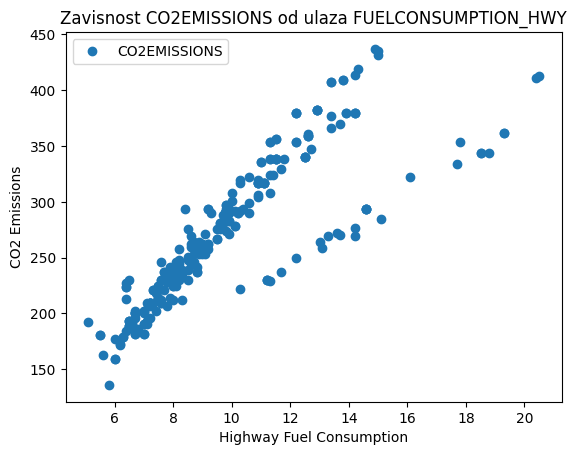

In [129]:
data.plot(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', style='o')

plt.xlabel('Highway Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.title('Zavisnost CO2EMISSIONS od ulaza FUELCONSUMPTION_HWY')
plt.show()

Iz skupa podataka se izdvaja 1 nezavisna promenljiva X (_FUELCONSUMPTION_HWY_) i druga promenljiva ciju vrednost procenjujemo Y (_CO2EMISSIONS_).

- X osa - nezavisna promenljiva (ulaz),
- Y osa - zavisna promenljiva (izlaz/rezultat)



---



U _reshape()_ metodi, prvi argument je broj vrsta (-1 znaci da se broj vrsta/redova preuzima iz originalnog niza), a drugi argument je broj kolona:

In [130]:
X = data['FUELCONSUMPTION_HWY'].values.reshape(-1, 1)
Y = data['CO2EMISSIONS'].values.reshape(-1, 1)

---

## Treniranje/Testiranje

Atribut i labela se dele na deo za treniranje i deo za testiranje (_u odnosu 80:20_).

- Atribut (ulaz u model - informacije na osnovu kojih model uci),
- Labela (izlaz iz modela - ono sto zelimo da model predvidi)

Podaci se u train i test skupove ubacuju na slucajan nacin. Parametar _random_state_ je seed za taj slucajni izbor da bi izbor za svako izvrsenje programa bio isti.

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

---

## Obucavanje modela

Kreiranje modela linearne regresije:

In [120]:
model = LinearRegression()

# Treniranje modela
model.fit(X_train, Y_train)

LinearRegression()



---



Opsta forma linearne regresije: _y = a*x + b_

- x - ulazna promenljiva (_FUELCONSUMPTION_HWY_),
- y - predvidjena vrednost/izlazna promenljiva (_CO2EMISSIONS_),
- a - nagib prave,
- b - slobodni clan

In [121]:
print('Slobodni clan: ', model.intercept_)
print('Nagib prave: ', model.coef_)

Slobodni clan:  [85.59020605]
Nagib prave:  [[18.86373758]]


Predvidjanje vrednosti regresionim modelom:

In [134]:
Y_pred = model.predict(X_test)

---

## Rezultat

### Poredjenje stvarnih i predvidjenih vrednosti

In [135]:
df = pd.DataFrame({'Stvarno ': Y_test.flatten(), 'Predvidjeno ': Y_pred.flatten()})

print(df.head(15))

    Stvarno   Predvidjeno 
0        340    321.386926
1        191    219.522743
2        221    223.295490
3        292    279.886703
4        359    323.273300
5        172    202.545379
6        317    294.977693
7        258    259.136592
8        189    208.204500
9        281    268.568461
10       338    302.523188
11       225    236.500107
12       209    221.409117
13       294    281.773077
14       246    249.704723


Prikaz stvarnih i predvidjenih vrednosti

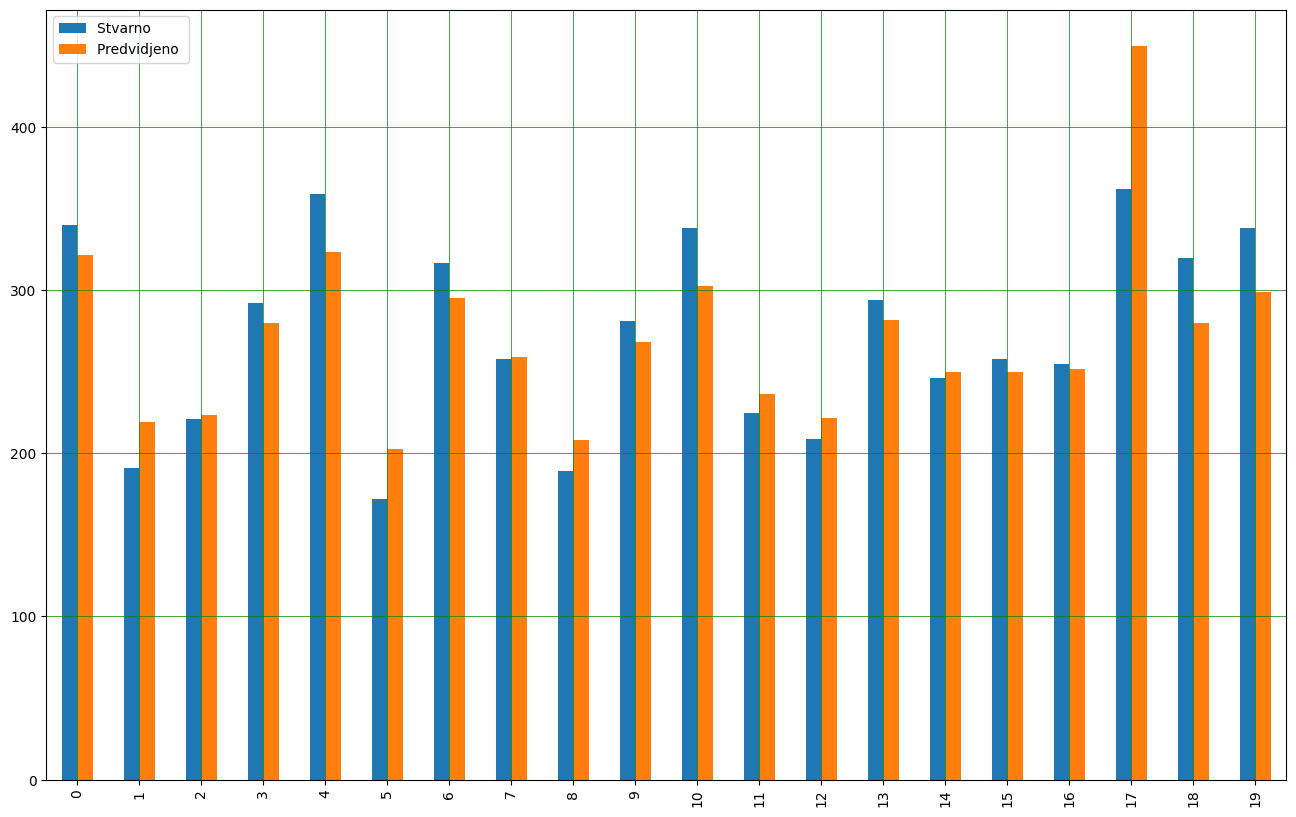

In [139]:
sp_df = df.head(20)

sp_df.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

---

Odredjivanje kvaliteta procene:

In [138]:
print('Srednja apsolutna greška:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Koeficijent determinacije:', model.score(X_test, Y_test))

Srednja apsolutna greška: 23.469230085788936
Koeficijent determinacije: 0.6756946087057445


Srednja apsolutna greska pokazuje neko odstupanje od stvarne vrednosti. (Pogledaj _Prikaz stvarnih i predvidjenih vrednosti_)

Koeficijent determinacije pokazuje koliko "dobro" linija regresije odgovara stvarnim podacima. Meri se "prilagodjenost" modela, ne njegova tacnost.

- Koeficijent determinacije: 0.68 - Model objasnjava 68% ukupne varijacije emisije CO2. Preostalih 32% su "greske" koje model ne moze da objasni.

---

### Vizuelni prikaz linearne regresije

Prikaz svih stvarnih vrednosti (dijagram rasipanja) i regresione prave:

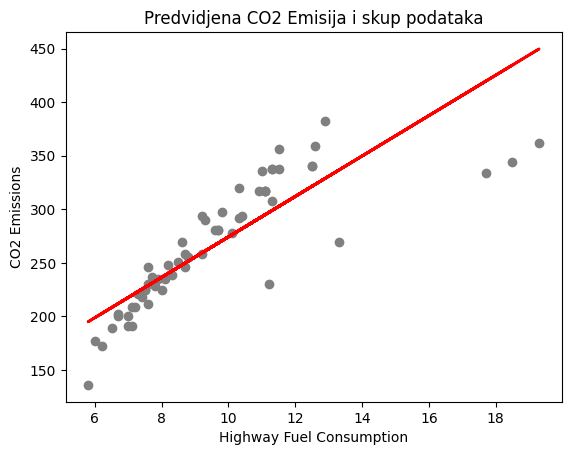

In [125]:
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.title('Predvidjena CO2 Emisija i skup podataka')
plt.xlabel('Highway Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()



---



Zavisnost CO2EMISSION od ulaza MAKE

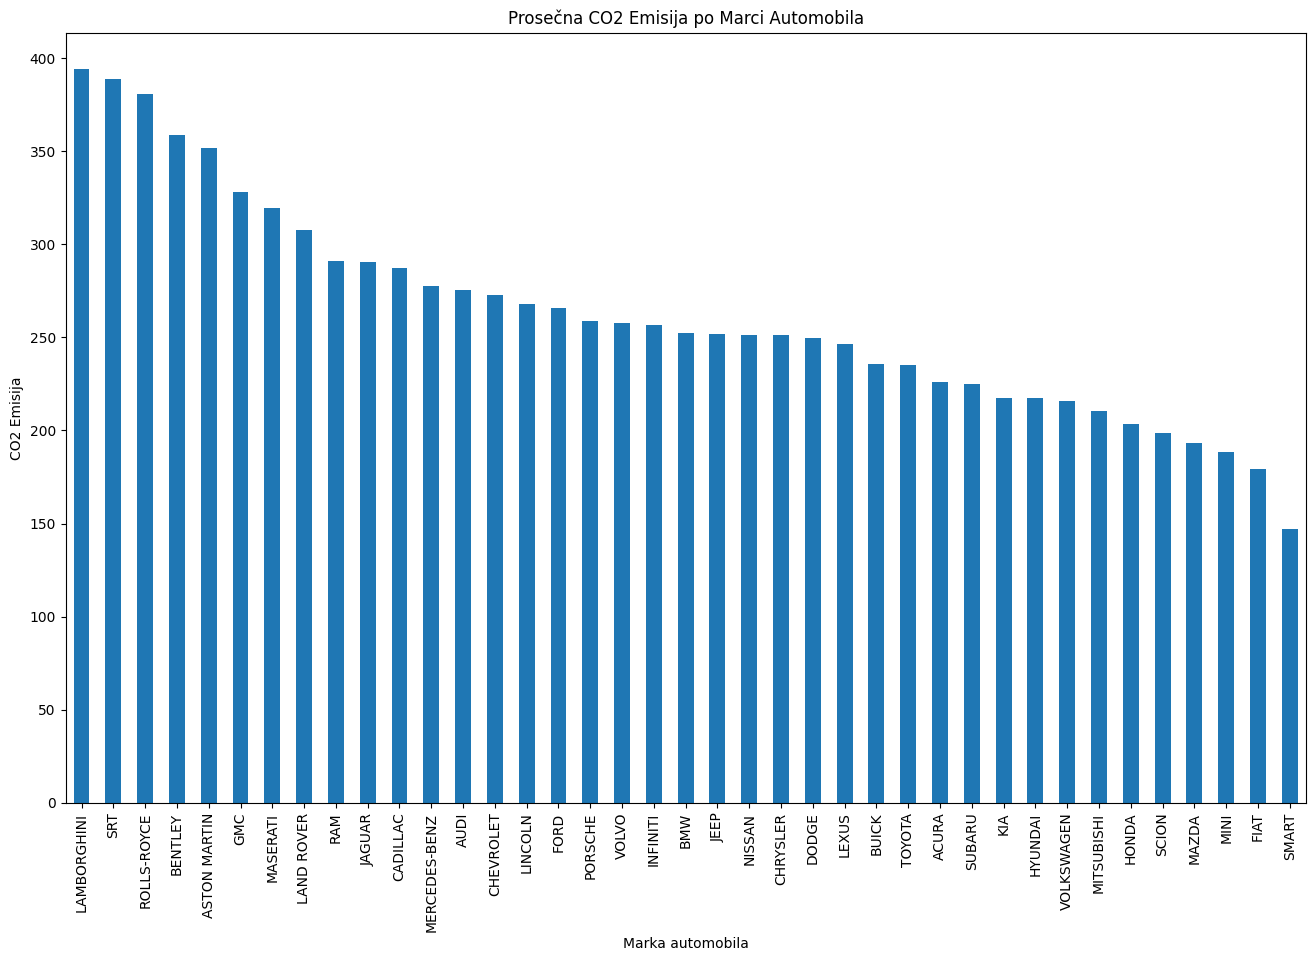

In [107]:
data = pd.read_csv("fuel_consumption.csv")

srednje_emisije = data.groupby('MAKE')['CO2EMISSIONS'].mean().sort_values(ascending=False)

srednje_emisije.plot(kind='bar', figsize=(16,10))

plt.title('Prosečna CO2 Emisija po Marci Automobila')
plt.xlabel('Marka automobila')
plt.ylabel('CO2 Emisija')
plt.show()